In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report, accuracy_score
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train = X_train.reshape(-1, 28 * 28).astype(np.float32)
X_test = X_test.reshape(-1, 28 *28).astype(np.float32)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


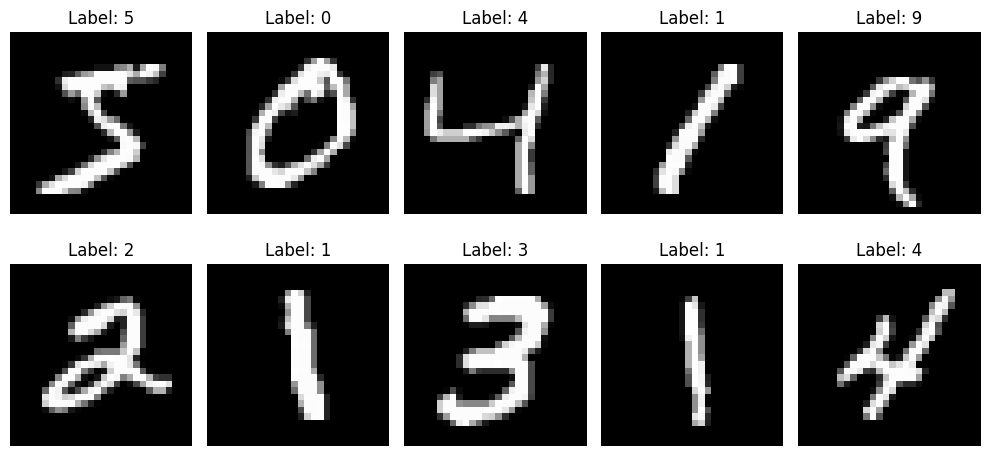

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_train[i].reshape(28, 28), cmap = 'gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
clf = LinearSVC(dual=False, max_iter=10)

In [ ]:
clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=False, max_iter=10)

In [ ]:
y_pred = clf.predict(X_test_scaled)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9163


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.95      0.98      0.96      1135
           2       0.93      0.88      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.92      0.93      0.92       982
           5       0.88      0.86      0.87       892
           6       0.93      0.95      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.87      0.86      0.87       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.91     10000
weighted avg       0.92      0.92      0.92     10000



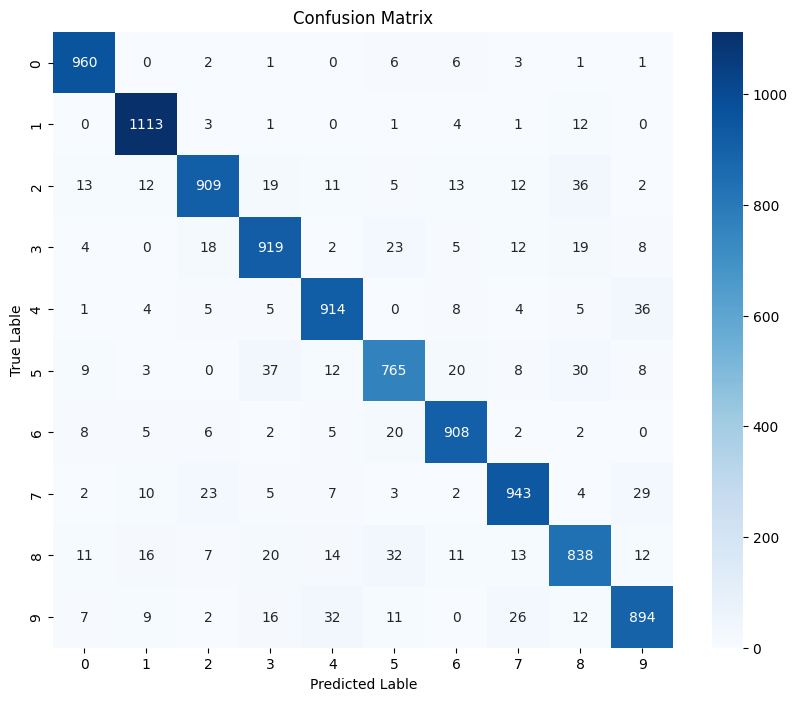

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Lable')
plt.ylabel('True Lable')
plt.show()

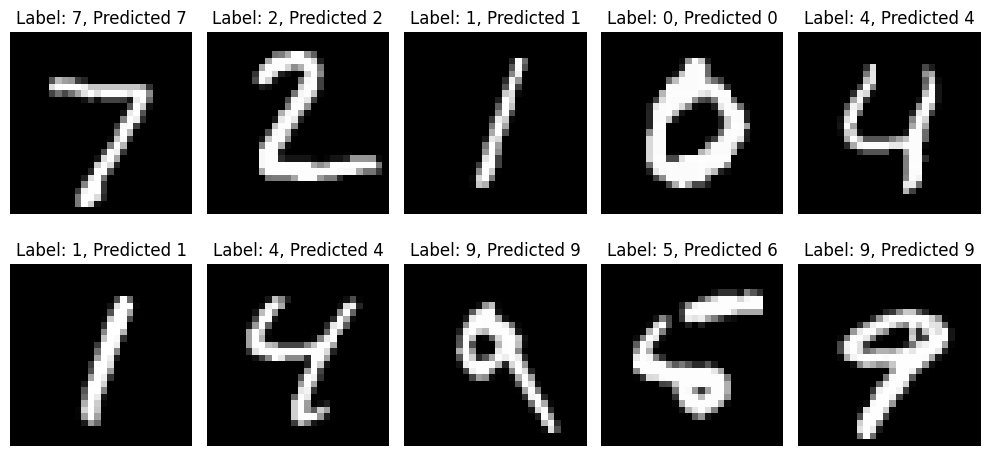

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[i].reshape(28, 28), cmap = 'gray')
    ax.set_title(f"Label: {y_test[i]}, Predicted {y_pred[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

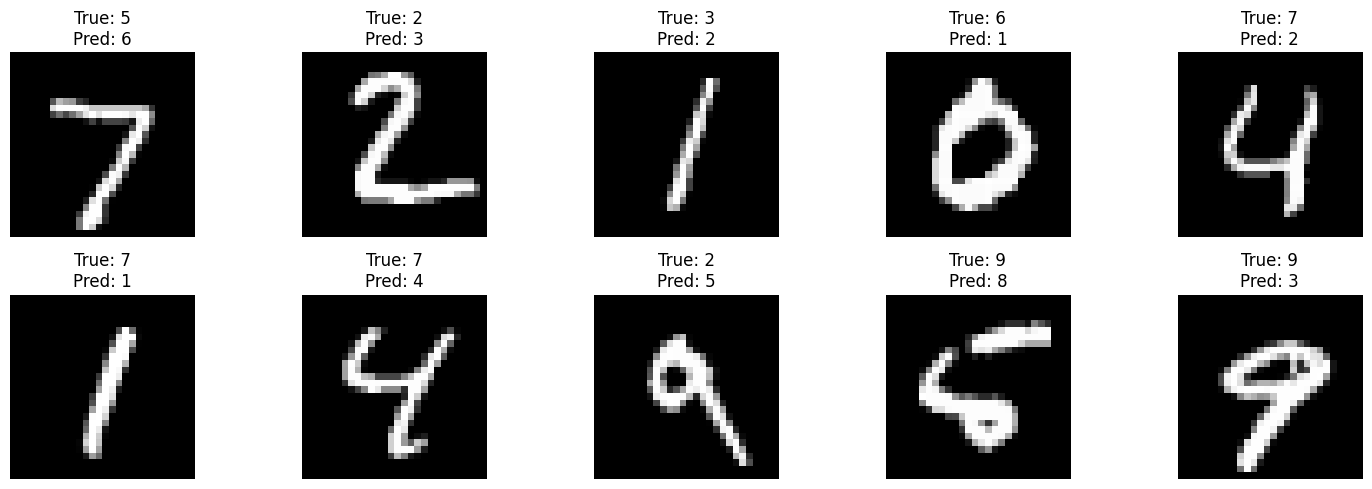

In [ ]:
misclassified_indices = np.where(y_test != y_pred)[0]
plt.figure(figsize=(15,5))
for i, index in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap = 'gray')
    plt.title(f"True: {y_test[index]}\nPred: {y_pred[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
weights = clf.coef_
biases = clf.intercept_
print(weights.shape, biases)

(10, 784) [-2.95258928 -3.69349937 -1.80956589 -1.98311729 -2.72051569 -1.88057748
 -2.71084417 -3.07406188 -1.5869174  -2.36302348]


In [ ]:
with open("svm_model.h", "w") as f:
    f.write(f"#define NUM_CLASSES {weights.shape[0]}\n")
    f.write(f"#define NUM_FEATURES {weights.shape[1]}\n")

    f.write("double weigths[NUM_CLASSES][NUM_FEATURES] = {\n")
    for row in weights:
        f.write("    {"+ ", ".join(f"{v:.10f}" for v in row) + "},\n")
    f.write("};\n\n")

    f.write("double bias[NUM_CLASSES] = {" + ", ".join(f"{b:.10f}" for b in biases) + "};\n")

print(" Exported SVM model to svm_model.h")

 Exported SVM model to svm_model.h


In [ ]:
mean =   scaler.mean_
scale = scaler.scale_
with open("scaler.h", "w") as f:
    f.write(f"#define NUM_FEATURES {len(mean)}\n\n)")

    f.write("double mean[NUM_FEATURES] = {\n")
    f.write("    " + ", ".join(f"{m:.10f}" for m in mean) + "\n};\n\n")

    f.write("double scale[NUM_FEATURES] = {\n}")
    f.write("    " + ", ".join(f"{s:.10f}" for s in scale) + "\n};\n")

print("Exported scaler parameter to scaler.h")

Exported scaler parameter to scaler.h


In [ ]:
NUM_IMAGES_TO_EXPORT = 10

In [ ]:
assert X_test.shape[1] == 784
X_sample = X_test[:NUM_IMAGES_TO_EXPORT]
y_sample = y_test[:NUM_IMAGES_TO_EXPORT]


In [ ]:
def export_test_images_to_c(images, labels, filename="test_image.h"):
  num_images, num_features = images.shape
  with open(filename, "w") as f:
    f.write("ifndef TEST_IMAGES_H\n#define TEST_IMAGES_H\n\n")
    f.write(f"#define NUM_TEST_IMAGES {num_images}\n")
    f.write(f"#define NUM_FEATURES {num_features}\n\n")

    # Write image data
    f.write(f"float test_images[NUM_TEST_IMAGES][NUM_FEATURES] = {{\n")
    for img in images:
        f.write("    { " + ", ".join(f"{px:.6f}" for px in img) + " },\n")
    f.write("};\n\n")

    # Write labels (as integer)
    f.write(f"int test_labels[NUM_TEST_IMAGES] = {{ ")
    f.write(", ".join(str(label) for label in labels))
    f.write(" };\n\n")

    f.write("#endif // TEST_IMAGES_H\n")

  print(f"Exported {num_images} test images to {filename}")

In [ ]:
export_test_images_to_c(X_sample, y_sample, "test_images.h")

Exported 10 test images to test_images.h


In [ ]:
def export_test_images_to_c(images, labels, filename="test_image.h"):
  num_images, num_features = images.shape
  images_int8 = images.astype(np.uint8)
  with open(filename, "w") as f:
    f.write("ifndef TEST_IMAGES_H\n#define TEST_IMAGES_H\n\n")
    f.write(f"#define NUM_TEST_IMAGES {num_images}\n")
    f.write(f"#define NUM_FEATURES {num_features}\n\n")

    # Write image data
    f.write(f"int8_t test_images[NUM_TEST_IMAGES][NUM_FEATURES] = {{\n")
    for img in images_int8:
        f.write("    { " + ", ".join(str(px) for px in img) + " },\n")
    f.write("};\n\n")

    # Write labels (as integer)
    f.write(f"int test_labels[NUM_TEST_IMAGES] = {{ ")
    f.write(", ".join(str(label) for label in labels))
    f.write(" };\n\n")

    f.write("#endif // TEST_IMAGES_H\n")

  print(f"Exported {num_images} test images to {filename}")

In [ ]:
export_test_images_to_c(X_sample, y_sample, "test_images.h")

Exported 10 test images to test_images.h


In [ ]:
max_val = np.abs(weights).max()
w_scale = max_val / 127.0
weights_int8 = np.round(weights / w_scale).astype(np.int8)
max_val = np.abs(biases).max()
b_scale = max_val / 127.0
biases_int8 = np.round(biases / b_scale).astype(np.int8)
with open("svm_model.h", "w") as f:
    f.write(f"#define NUM_CLASSES {weights.shape[0]}\n")
    f.write(f"#define NUM_FEATURES {weights.shape[1]}\n")
    f.write(f"const float weight_scale = {w_scale:.10f}f;\n\n")

    f.write("double weigths[NUM_CLASSES][NUM_FEATURES] = {\n")
    for row in weights_int8:
        f.write("    {"+ ", ".join(str(v) for v in row) + "},\n")
    f.write("};\n\n")

    f.write("int8 bias[NUM_CLASSES] = {" + ", ".join(str(b) for b in biases_int8) + "};\n")

print(" Exported SVM model to svm_model.h")

In [62]:
mean =   scaler.mean_
max_mean = np.abs(mean).max()
m_scale = max_mean / 127.0
mean_int8 = np.round(mean / m_scale).astype(np.int8)
op_scale = scaler.scale_
max_scale = np.abs(op_scale).max()
s_scale = max_scale / 127.0
scale_int8 = np.round(op_scale / s_scale).astype(np.int8)
with open("scaler.h", "w") as f:
    f.write(f"#define NUM_FEATURES {len(mean)}\n\n)")
    f.write(f"const float scale_scale = {s_scale:.10f}f;\n\n")
    f.write(f"const float mean_scale = {m_scale:.10f}f;\n\n")

    f.write("int8_t mean[NUM_FEATURES] = {\n")
    f.write("    " + ", ".join(str(m) for m in mean_int8) + "\n};\n\n")

    f.write("int8_t scale[NUM_FEATURES] = {\n}")
    f.write("    " + ", ".join(str(s) for s in scale_int8) + "\n};\n")

print("Exported scaler parameter to scaler.h")

Exported scaler parameter to scaler.h


In [61]:
max_val = np.abs(weights).max()
w_scale = max_val / 127.0
weights_int8 = np.round(weights / w_scale).astype(np.int8)
max_val = np.abs(biases).max()
b_scale = max_val / 127.0
biases_int8 = np.round(biases / b_scale).astype(np.int8)
with open("svm_model.h", "w") as f:
    f.write(f"#define NUM_CLASSES {weights.shape[0]}\n")
    f.write(f"#define NUM_FEATURES {weights.shape[1]}\n")
    f.write(f"const float weight_scale = {w_scale:.10f}f;\n\n")
    f.write(f"const float bias_scale = {b_scale:.10f}f;\n\n")

    f.write("int8_t weigths[NUM_CLASSES][NUM_FEATURES] = {\n")
    for row in weights_int8:
        f.write("    {"+ ", ".join(str(v) for v in row) + "},\n")
    f.write("};\n\n")

    f.write("int8_t bias[NUM_CLASSES] = {" + ", ".join(str(b) for b in biases_int8) + "};\n")

print(" Exported SVM model to svm_model.h")

 Exported SVM model to svm_model.h
